# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# import datasets and transformations (reusability purposes)
from IPython import get_ipython

get_ipython().run_line_magic('run', 'datasets.ipynb')

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_19091/2542517297.py:4: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv('../datasets/stock_forecasting/raw/2022-2025/[LT] Products [STOCK].txt', sep='\t', header=0) # stock
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_19091/2542517297.py:5: DtypeWarning: Columns (5,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv('../datasets/stock_forecasting/raw/2022-2025/[LT] Tickets [CUSTOM] [ITEMS].txt', sep='\t', header=0) # customer order items
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_19091/2542517297.py:6: DtypeWarning: Columns (43,57,104,139,210,244,251,289,293,310,321,324,326,344,348) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv('../datasets/stock_forecasting/raw/2022-2025/[LT] Tickets [CUSTOM] [MAIN].tx

-------------- Product [STOCK] ----------------
   Adhesive  Alternate  Available  BackOrdered Box_Size  CaseQty Color  \
0       NaN        NaN          0            0      NaN      NaN   NaN   
1       NaN        NaN          0            0      NaN      NaN   NaN   
2       NaN        NaN          0            0      NaN      NaN   NaN   
3       NaN        NaN          0            0      NaN      NaN   NaN   
4       NaN        NaN          0            0      NaN      NaN   NaN   

   Commission   Cost  Currency_ExchangeRate  ...  SupplierName  SupplierNo  \
0           0   0.00                      0  ...           NaN         NaN   
1           0   0.00                      0  ...           NaN         NaN   
2           0   0.00                      0  ...           NaN         NaN   
3           0   0.00                      0  ...           NaN         NaN   
4           0  49.11                      0  ...           NaN         NaN   

  SupplierNotes SupplierPartNo Tag Tot

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_19091/3782586238.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'], errors='coerce')
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_19091/3782586238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'], errors='coerce')
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_19091/3782586238.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil

In [4]:
# create solution to add each first three unique values of the column 'ProductNumber' to a list
products_by_customer = set()

# loop through all product numbers
for index, row in product_sales.iterrows():
    product = row['ProductNumber']
    for i in range(len(product) - 2):
        customer_code = product[i:i+3]  # get the first three characters of the product number

        # add the customer code to the set
        products_by_customer.add(customer_code)

        # create a list for each customer code / if it exists, add it to the existing customer code list
        if f'custom_code_{customer_code}' in locals():
            locals()[f'custom_code_{customer_code}'].append(row.to_dict())
        else:
            locals()[f'custom_code_{customer_code}'] = [row.to_dict()]

print(f"All custom codes for existing products: \n{products_by_customer} \n ------------------------------------")

# Example to print one of the custom code lists
if 'custom_code_GOL' in locals():
    print(f"Records for custom code FRE: \n{locals()['custom_code_GOL']}")

All custom codes for existing products: 
{'66Y', '892', 'GJH', '597', 'LAT', '05S', '30-', '875', '49W', '09U', '42V', 'FR-', '53Y', '023', '430', '9Z-', '973', 'F-0', '73Z', '544', 'OA-', '577', '05-', '993', '188', '175', 'BSF', '37S', '586', '065', '830', '600', '452', '335', '499', '18U', '27W', '200', '797', '3X-', '651', '778', '537', 'BLO', 'MAR', 'GHL', '179', '951', '97W', '62W', 'H-0', '938', 'DAK', 'WCW', '32Z', '737', '400', '405', '371', '654', '755', 'MIK', 'OS-', 'HSP', '34Z', '12R', 'PER', '320', '47V', 'HO-', '730', '3-1', 'SS-', '64Y', 'QU-', 'PRX', 'CSI', '80V', '60Y', '1Y-', '699', 'UNC', '494', '80W', '374', 'PG-', '03X', '39Z', '24U', '62X', '58V', '60R', '507', '61V', '186', 'SSS', '650', '73T', '876', 'R-0', '453', '394', '231', '66X', '155', '56Y', 'OM-', '836', '089', '736', '578', '41X', 'BL-', '26U', '79S', '88Y', '786', 'PFG', '395', '11Z', '477', '035', 'GVA', '3-0', '249', 'AQU', '920', 'WEX', '-A2', 'XP-', '145', 'RB-', '381', '745', 'BJ-', 'HOU', '466',

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# convert custom_code_FRE to a DataFrame
custom_code_df = pd.DataFrame(custom_code_GOL)

custom_code_df.head()

,ProductNumber,order_year,order_month,order_week,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,prev_2_month_sales,prev_3_month_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,GOL-005-0001X,2024,11,46,199.0,18000,108469.569193,108469.569193,116875.76046,123553.037584,...,18000.0,18000.0,18000.000000,18000.000000,0,0,18000,NaN,inf,0
1,GOL-005-0001Y,2023,2,6,199.0,18000,18000.000000,18000.000000,36000.00000,18000.000000,...,24000.0,24000.0,24600.000000,24600.000000,0,18000,0,inf,-100.0,6000
2,GOL-005-0001Y,2023,3,11,199.0,18000,36000.000000,36000.000000,18000.00000,36000.000000,...,24000.0,27000.0,25333.333333,25333.333333,0,18000,0,inf,-100.0,6000
3,GOL-005-0001Y,2023,4,14,199.0,36000,18000.000000,18000.000000,36000.00000,18000.000000,...,30000.0,26000.0,26250.000000,26250.000000,0,36000,0,inf,-100.0,6000
4,GOL-005-0001Y,2023,4,15,199.0,18000,36000.000000,36000.000000,18000.00000,36000.000000,...,24000.0,23000.0,24857.142857,24857.142857,0,18000,0,inf,-100.0,6000


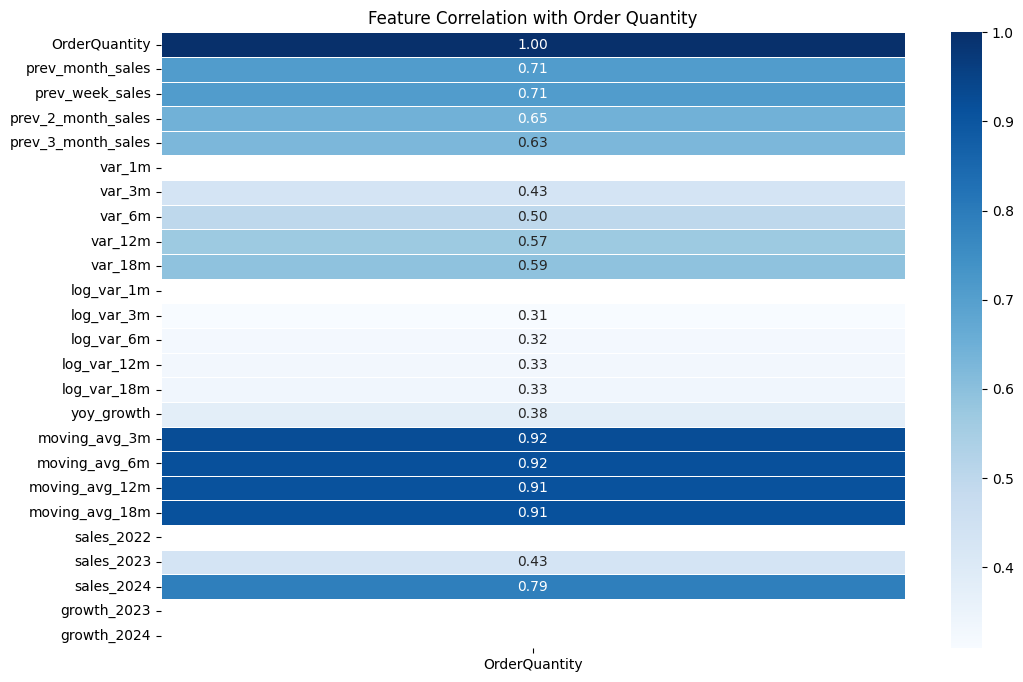

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical features
numerical_features = [
    'OrderQuantity', 'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 
    'prev_3_month_sales', 'var_1m', 'var_3m', 'var_6m', 'var_12m', 'var_18m', 
    'log_var_1m', 'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m', 
    'yoy_growth', 'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m', 
    'sales_2022', 'sales_2023', 'sales_2024', 'growth_2023', 'growth_2024'
]

# Compute correlation matrix
corr_matrix = custom_code_df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(12, 8))  # Adjust size for better readability
sns.heatmap(corr_matrix[['OrderQuantity']], cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Order Quantity")
plt.show()

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df = custom_code_df.copy()

features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features)  # one-hot encode categorical features
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)

df.head()

,ProductNumber,order_year,order_month,order_week,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,prev_2_month_sales,prev_3_month_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,GOL-005-0001X,2024,11,46,199.0,18000,108469.569193,108469.569193,116875.76046,123553.037584,...,18000.0,18000.0,18000.000000,18000.000000,0,0,18000,NaN,inf,0
1,GOL-005-0001Y,2023,2,6,199.0,18000,18000.000000,18000.000000,36000.00000,18000.000000,...,24000.0,24000.0,24600.000000,24600.000000,0,18000,0,inf,-100.0,6000
2,GOL-005-0001Y,2023,3,11,199.0,18000,36000.000000,36000.000000,18000.00000,36000.000000,...,24000.0,27000.0,25333.333333,25333.333333,0,18000,0,inf,-100.0,6000
3,GOL-005-0001Y,2023,4,14,199.0,36000,18000.000000,18000.000000,36000.00000,18000.000000,...,30000.0,26000.0,26250.000000,26250.000000,0,36000,0,inf,-100.0,6000
4,GOL-005-0001Y,2023,4,15,199.0,18000,36000.000000,36000.000000,18000.00000,36000.000000,...,24000.0,23000.0,24857.142857,24857.142857,0,18000,0,inf,-100.0,6000


In [8]:
# the top 10 products by total actual order quantity
top_products = df.groupby('ProductNumber')['OrderQuantity'].sum().nlargest(10)

# extract top product code rows from the original df
top_prods_df = df[df['ProductNumber'].isin(top_products.index)]

# Extract top product numbers
top_product_numbers = top_products.index.tolist()  # List of top product numbers

top_prods_df.head()

,ProductNumber,order_year,order_month,order_week,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,prev_2_month_sales,prev_3_month_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
52,GOL-005-0049Z,2023,1,4,199.0,304000,228000.0,228000.0,418000.0,190000.0,...,316666.666667,286333.333333,287090.909091,287090.909091,0,304000,0,inf,-100.0,0
53,GOL-005-0049Z,2023,2,6,199.0,228000,418000.0,418000.0,190000.0,418000.0,...,278666.666667,262333.333333,285400.000000,285400.000000,0,228000,0,inf,-100.0,0
54,GOL-005-0049Z,2023,2,7,199.0,418000,190000.0,190000.0,418000.0,160000.0,...,342000.000000,272333.333333,291777.777778,291777.777778,0,418000,0,inf,-100.0,0
55,GOL-005-0049Z,2023,2,8,199.0,190000,418000.0,418000.0,160000.0,160000.0,...,256000.000000,288000.000000,276000.000000,276000.000000,0,190000,0,inf,-100.0,0
56,GOL-005-0049Z,2023,5,19,199.0,418000,160000.0,160000.0,160000.0,288000.0,...,246000.000000,315000.000000,288285.714286,288285.714286,0,418000,0,inf,-100.0,0


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# Step 2: Filter the top products
tp_X = top_prods_df[features]  # Features from top products
tp_y = top_prods_df[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Step 6: Train-test split
tp_X_train, tp_X_val, tp_y_train, tp_y_val = train_test_split(tp_X, tp_y, test_size=0.2, random_state=42)

# Transform the features
tp_X_train_transformed = preprocessor.fit_transform(tp_X_train)
tp_X_val_transformed = preprocessor.transform(tp_X_val)

# Output the shape
print(f"Train Shape: {tp_X_train_transformed.shape}, Validation Shape: {tp_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")


Train Shape: (130, 30), Validation Shape: (33, 30)
Feature processing for top products completed successfully!


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [11]:
from sklearn.ensemble import RandomForestRegressor
import sys
sys.path.append('../src')
from model_utils import find_best_hyperparameters, param_grids, evaluate_model

In [12]:
# train the model with scaled features (Random Forest Regressor)
rf = RandomForestRegressor()
rf_params = find_best_hyperparameters(rf, param_grids(rf.__class__.__name__), X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

KeyboardInterrupt: 

In [ ]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)

In [31]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(rf, X_train_scaled, y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(rf, X_val_scaled, y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 5704.1658
Mean Squared Error (MSE): 546187564.3329
Root Mean Squared Error (RMSE): 23370.6561
R-squared (R²): 0.9603
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 15867.7384
Mean Squared Error (MSE): 2706108182.2211
Root Mean Squared Error (RMSE): 52020.2670
R-squared (R²): 0.8004
--------------------------------------------


In [27]:
# train the model with scaled features (Random Forest Regressor) - TOP PRODUCTS IMPLEMENTATION
tp_rf = RandomForestRegressor()
tp_rf_params = find_best_hyperparameters(tp_rf, param_grids(tp_rf.__class__.__name__), tp_X_train_transformed, tp_y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

In [28]:
tp_rf = RandomForestRegressor(**tp_rf_params)
tp_rf.fit(tp_X_train_transformed, tp_y_train)
tp_y_pred_rf = tp_rf.predict(tp_X_val_transformed)

In [30]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(tp_rf, tp_X_train_transformed, tp_y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(tp_rf, tp_X_val_transformed, tp_y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 50808.6733
Mean Squared Error (MSE): 9613206697.5448
Root Mean Squared Error (RMSE): 98046.9617
R-squared (R²): 0.8182
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 83991.1737
Mean Squared Error (MSE): 14879934213.0312
Root Mean Squared Error (RMSE): 121983.3358
R-squared (R²): 0.7719
--------------------------------------------


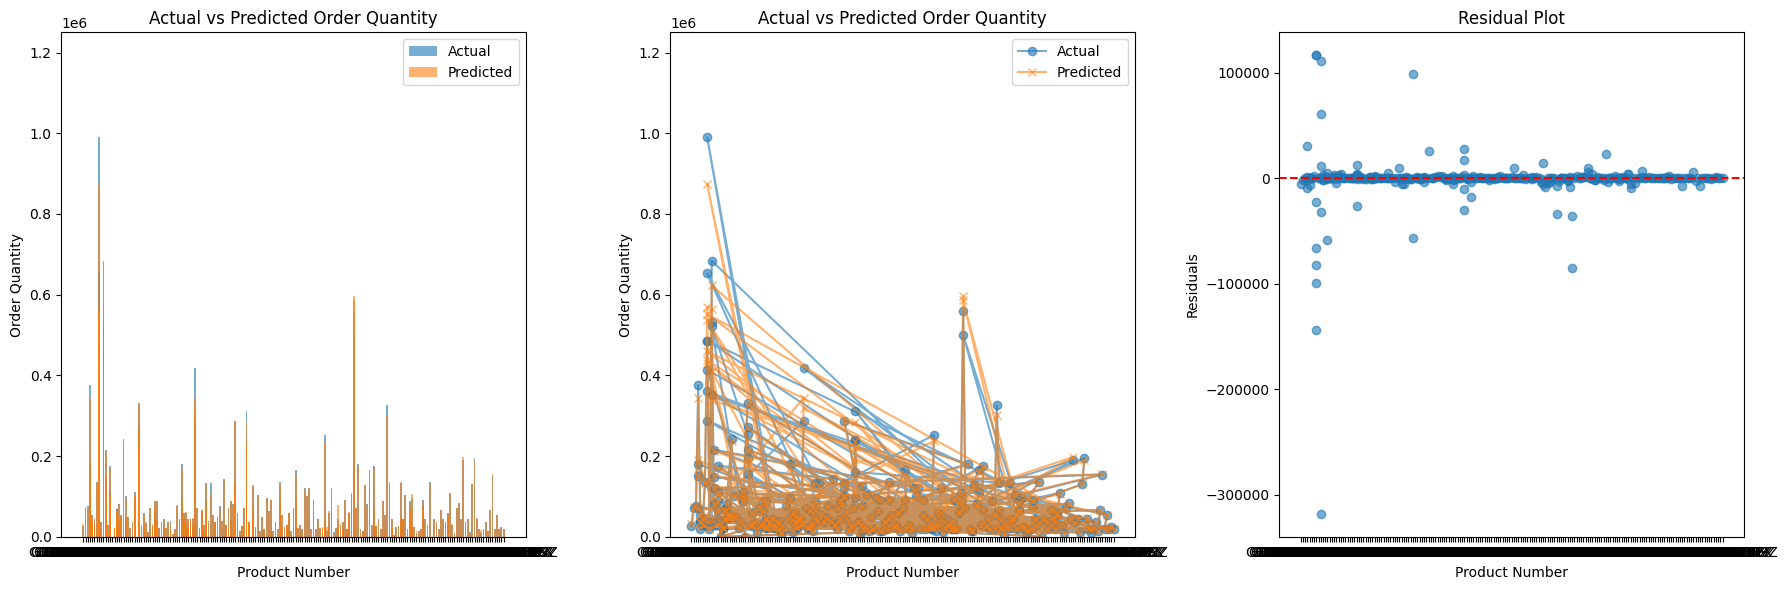

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# bar plot, actual and predicted values
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_val, label='Actual', alpha=0.6)
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Product Number')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title('Actual vs Predicted Order Quantity')
axes[0].set_ylim(0, 1250000)
axes[0].legend()

# line plot, actual and predicted values
axes[1].plot(df.loc[y_val.index, 'ProductNumber'], y_val, label='Actual', alpha=0.6, marker='o')
axes[1].plot(df.loc[y_val.index, 'ProductNumber'], y_pred_rf, label='Predicted', alpha=0.6, marker='x')
axes[1].set_xlabel('Product Number')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title('Actual vs Predicted Order Quantity')
axes[1].set_ylim(0, 1250000)
axes[1].legend()

# residual plot
residuals = y_val - y_pred_rf
axes[2].scatter(df.loc[y_val.index, 'ProductNumber'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Product Number')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residual Plot')

plt.tight_layout()
plt.show()

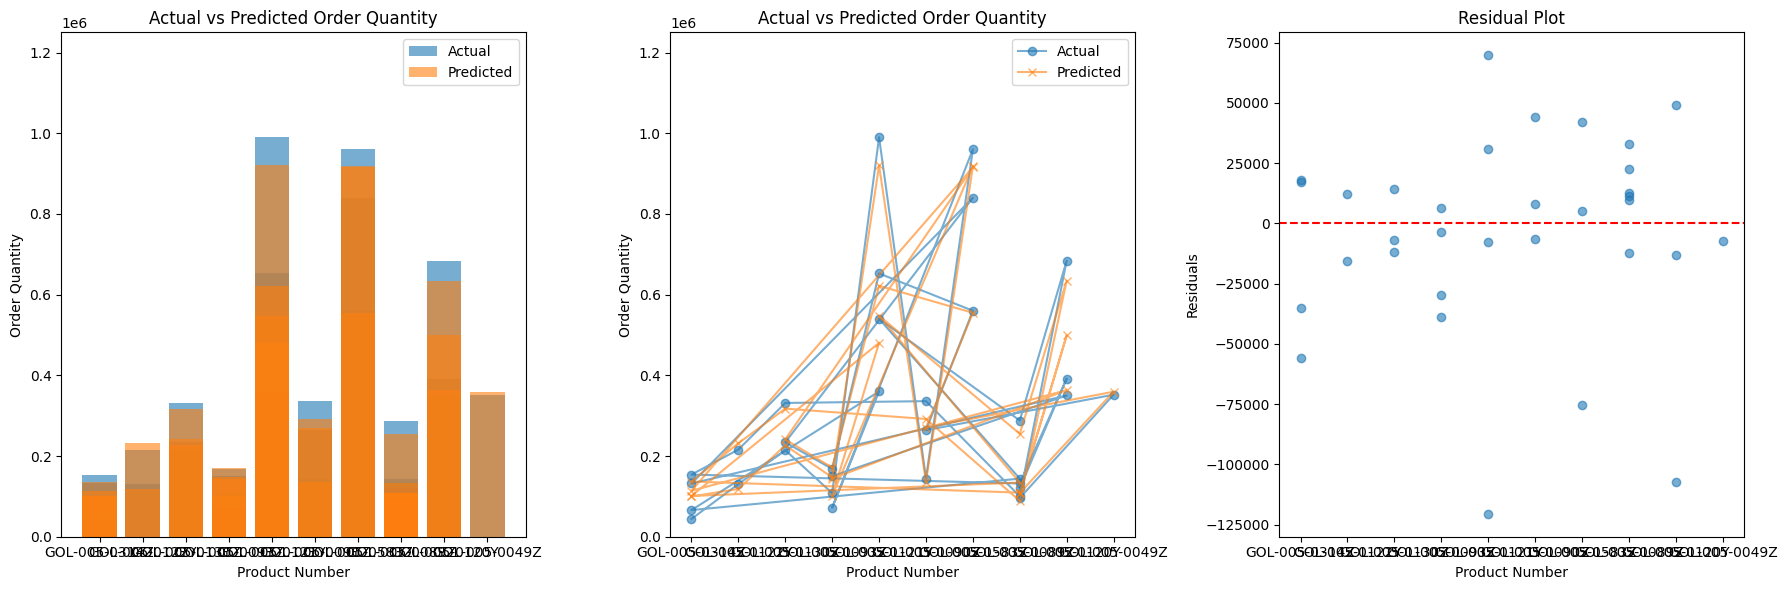

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# bar plot, actual and predicted values
axes[0].bar(top_prods_df.loc[tp_y_val.index, 'ProductNumber'], tp_y_val, label='Actual', alpha=0.6)
axes[0].bar(top_prods_df.loc[tp_y_val.index, 'ProductNumber'], tp_y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Product Number')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title('Actual vs Predicted Order Quantity')
axes[0].set_ylim(0, 1250000)
axes[0].legend()

# line plot, actual and predicted values
axes[1].plot(top_prods_df.loc[tp_y_val.index, 'ProductNumber'], tp_y_val, label='Actual', alpha=0.6, marker='o')
axes[1].plot(top_prods_df.loc[tp_y_val.index, 'ProductNumber'], tp_y_pred_rf, label='Predicted', alpha=0.6, marker='x')
axes[1].set_xlabel('Product Number')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title('Actual vs Predicted Order Quantity')
axes[1].set_ylim(0, 1250000)
axes[1].legend()

# residual plot
residuals = tp_y_val - tp_y_pred_rf
axes[2].scatter(top_prods_df.loc[tp_y_val.index, 'ProductNumber'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Product Number')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residual Plot')

plt.tight_layout()
plt.show()

[31708.009523809524, 73231.28571428572, 74836.75, 344664.6547619047, 35955.166666666664, 29644.333333333336, 132591.80952380953, 568628.0873015873, 35980.0, 563960.9682539684, 80160.09523809524, 29978.4, 87120.08333333331, 220.7255952380953, 22000.0, 64412.05952380953, 48814.49761904762, 18010.0, 46542.13095238094, 43947.16666666666, 237974.41666666663, 49249.71666666666, 49940.55, 49768.16666666666, 22458.648809523806, 35774.53333333333, 109494.32142857145, 220.7255952380953, 411278.04761904763, 241286.22619047618, 30023.102380952387, 59766.399999999994, 35839.84333333333, 12772.857142857143, 191755.17063492062, 72211.69047619047, 28737.595238095237, 151396.94047619047, 66254.78571428572, 44189.71428571428, 22039.416666666664, 35876.666666666664, 22027.440476190477, 80883.16666666669, 22003.166666666664, 873580.0476190473, 35987.66666666667, 20000.0, 6120.030952380952, 88863.83333333331, 17629.86349206349, 78396.38095238095, 43861.25, 94383.17857142858, 189202.76190476186, 22027.44047

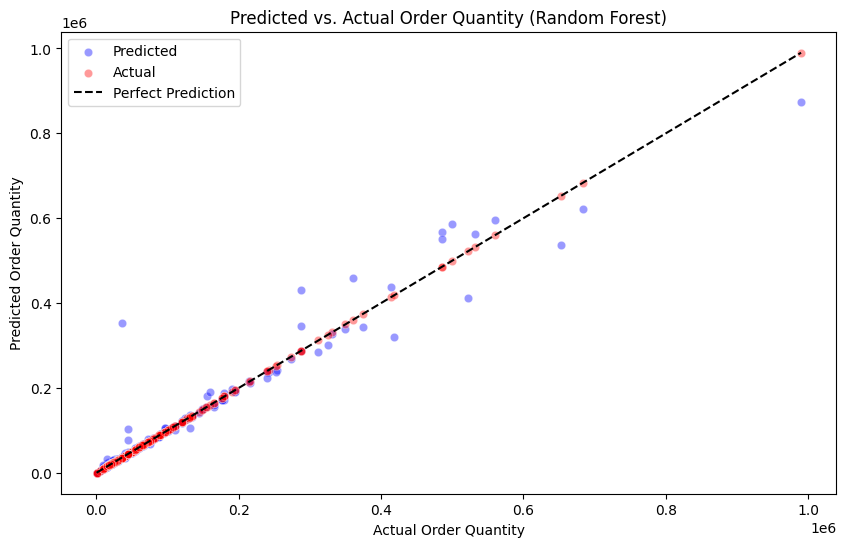

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(y_pred_rf.tolist())

plt.figure(figsize=(10, 6))

# scatter plot, actual vs predicted values
sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.4, color='blue', label='Predicted')  # Predicted values in blue

# actual values in red
sns.scatterplot(x=y_val, y=y_val, alpha=0.4, color='red', label='Actual')  

# reference line for perfect prediction
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='black', label="Perfect Prediction")

plt.xlabel("Actual Order Quantity")
plt.ylabel("Predicted Order Quantity")
plt.title("Predicted vs. Actual Order Quantity (Random Forest)")
plt.legend()

plt.show()

In [ ]:
# from powerbiclient import QuickVisualize, get_dataset_config, Report
# from powerbiclient.authentication import InteractiveLoginAuthentication, DeviceCodeLoginAuthentication
# import pandas as pd

# prod_sales = pd.read_csv(
#     '/Users/mwilko777/Desktop/Project/Software Artifact/datasets/stock_forecasting/final/product_sales.csv')

# # use DeviceCodeLoginAuthentication if want to sign in each time, else InteractiveLoginAuthentication
# auth = InteractiveLoginAuthentication()
# print("Authentication successful.")


# def visual():
#     dataset_config = get_dataset_config(prod_sales)
#     return QuickVisualize(dataset_config, auth)

# visual()